| <font size="5">Supervising Learning : Classification</font>||
|-|-|
||<img src="https://www.tibco.com/blog/wp-content/uploads/2013/04/telco-churn.jpg" width=300></img>|
|<font size="4"> DataSet loading  </font>| |
|<font size="4">    DataSet Processing</font>| |
|<font size="4">    DataSet Training</font>| |
|<font size="4">    Prediction & Algorithm Evaluation</font>| |



In [ ]:
pwd

'/content/drive/My Drive/ML/ML_iOT_Project/Machine_Learning'

In [ ]:
cd  drive/My\ Drive/ML/ML_iOT_Project/Machine_Learning

In [ ]:
!wget http://dataminingconsultant.com/DKD2e_data_sets.zip   -P  ./Data
!unzip -o ./Data/DKD2e_data_sets.zip

--2020-11-13 10:27:09--  http://dataminingconsultant.com/DKD2e_data_sets.zip
Resolving dataminingconsultant.com (dataminingconsultant.com)... 160.153.91.162
Connecting to dataminingconsultant.com (dataminingconsultant.com)|160.153.91.162|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003616 (980K) [application/zip]
Saving to: ‘./Data/DKD2e_data_sets.zip’

DKD2e_data_sets.zip 100%[===================>] 980.09K   476KB/s    in 2.1s    

2020-11-13 10:27:11 (476 KB/s) - ‘./Data/DKD2e_data_sets.zip’ saved [1003616/1003616]

Archive:  ./Data/DKD2e_data_sets.zip
 extracting: Data sets/adult.zip     
  inflating: Data sets/cars.txt      
  inflating: Data sets/cars2.txt     
  inflating: Data sets/cereals.CSV   
  inflating: Data sets/churn.txt     
  inflating: Data sets/ClassifyRisk  
  inflating: Data sets/ClassifyRisk - Missing.txt  
 extracting: Data sets/DKD2e data sets.zip  
  inflating: Data sets/nn1.txt       


In [ ]:
ls  ./Data


 adult.zip     churn_1.csv          ClassifyRisk                  nn1.txt
 cars2.txt     churn_features.csv  'ClassifyRisk - Missing.txt'
 cars.txt      churn_target.csv    'DKD2e data sets.zip'
 cereals.CSV   churn.txt            DKD2e_data_sets.zip


In [ ]:
ls -la  ./Data/chu*

-rw------- 1 root root 298774 Nov 15 05:24 ./Data/churn_1.csv
-rw------- 1 root root 202981 Sep 22 10:21 ./Data/churn_features.csv
-rw------- 1 root root  22229 Sep 22 10:21 ./Data/churn_target.csv
-rw------- 1 root root 437903 Jun 11  2017 ./Data/churn.txt


## $$\Large  \text {DataSet Loading ...}$$

In [27]:
import numpy as np
import pandas as pd


In [28]:

# Dataset Reading

df = pd.read_csv('./Data/churn.txt')


In [29]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [30]:
df.shape

(3333, 21)


This is a relatively small dataset, with only 3,333 records, where each record uses 21 attributes to describe the profile of a customer of an unknown US mobile operator.  
### List of attributes:
- **State**: the US state in which the customer resides, indicated by a two-letter  - abbreviation; for example, OH or NJ
- **Account** Length: the number of days that this account has been active
- **Area Code**: the three-digit area code of the corresponding customer’s phone number
- **Phone**: the remaining seven-digit phone number
- **Int’l Plan**: whether the customer has an international calling plan: yes/no
- **VMail Plan**: whether the customer has a voice mail feature: yes/no
- **VMail Message**: presumably the average number of voice mail messages per month
- **Day Mins**: the total number of calling minutes used during the day
- **Day Calls**: the total number of calls placed during the day
- **Day Charge**: the billed cost of daytime calls
- **Eve Mins, Eve Calls, Eve Charge**: the billed cost for calls placed during the evening
- **Night Mins, Night Calls, Night Charge**: the billed cost for calls placed during nighttime
- **Intl Mins, Intl Calls, Intl Charge**: the billed cost for international calls
- **CustServ Calls**: the number of calls placed to Customer Service
- **Churn?**: whether the customer left the service: true/false

__The last attribute, Churn?, is known as the target attribute–the attribute that we want the ML model to predict. Because the target attribute is binary, our model will be performing binary prediction, also known as binary classification._

Let's begin exploring the data:

In [31]:
df.keys()

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

## $$\Large  \text {Data processing }$$
![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [32]:
df['VMail Plan'].value_counts()

no     2411
yes     922
Name: VMail Plan, dtype: int64

In [33]:
df[['VMail Plan']].describe().T

,count,unique,top,freq
VMail Plan,3333,2,no,2411


In [34]:
# Frequency tables for each categorical feature
# better Presentation
display(pd.crosstab(df['VMail Plan'], columns='% observations'))  #, normalize=True))

col_0,% observations
VMail Plan,
no,2411
yes,922


In [35]:
# Frequency tables for each categorical feature
for col in df.select_dtypes("object").columns:
    display(pd.crosstab(index=df[col], columns='% observations', normalize='columns' ))
# Normalize by dividing all values by the sum of values

col_0,% observations
State,
AK,0.015602
AL,0.024002
AR,0.016502
AZ,0.019202
CA,0.010201
CO,0.019802
CT,0.022202
DC,0.016202
DE,0.018302


col_0,% observations
Phone,
327-1058,0.0003
327-1319,0.0003
327-3053,0.0003
327-3587,0.0003
327-3850,0.0003
...,...
422-7728,0.0003
422-8268,0.0003
422-8333,0.0003


col_0,% observations
Int'l Plan,
no,0.90309
yes,0.09691


col_0,% observations
VMail Plan,
no,0.723372
yes,0.276628


col_0,% observations
Churn?,
False.,0.855086
True.,0.144914





- *notice that only  14% of customers churned (leave). We are dealing with an **Imbalanced** data.*

In [36]:
# Histograms for each numeric features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## $$\Large Plotting$$

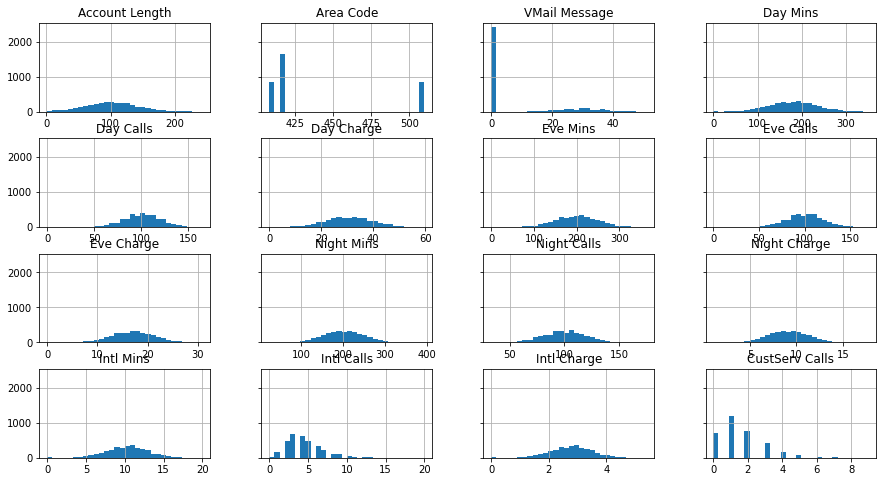

In [37]:

%matplotlib inline
hist = df.hist(bins=30, sharey=True, figsize=(15, 8))


Plotting analysis: 

- State appears to be quite evenly distributed
- Phone numbers are unique and their impact on any prediction is insignificant so we Will drop the feature. 

- Most of the numeric features are correctly distributed, with many showing bell-like gaussianity. 
- VMail Message being a notable exception.
- Area Code showing up as a feature we should convert to non-numeric.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [39]:
# Drop Phone  feature
df.drop('Phone', axis=1, inplace=True)

In [40]:
# Change  feature type 
df['Area Code'] = df['Area Code'].astype(object)
df['Area Code'].dtype

dtype('O')

In [41]:
df.sample(3)

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2869,NH,105,415,no,yes,20,186.9,114,31.77,256.3,91,21.79,334.7,104,15.06,8.9,2,2.40,1,False.
2600,NY,148,408,no,no,0,208.4,120,35.43,174.4,99,14.82,310.7,105,13.98,11.2,4,3.02,1,False.
140,DE,110,510,no,no,0,148.5,115,25.25,276.4,84,23.49,193.6,112,8.71,12.4,3,3.35,1,False.


In [42]:
# Dsiaplay All features Except the Target 
df.iloc[:,:-1].sample(3)

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
1510,NY,92,408,no,no,0,265.6,82,45.15,180.7,75,15.36,211.1,113,9.50,8.6,2,2.32,1
867,NV,86,510,no,no,0,141.3,72,24.02,154.3,95,13.12,210.6,91,9.48,8.2,5,2.21,1
1496,LA,81,415,no,yes,36,115.9,120,19.70,236.6,95,20.11,255.0,90,11.48,11.7,6,3.16,3


In [43]:
df.iloc[:,:-1].columns
# Same command   : df.drop("Churn?", axis=1).columns

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls'],
      dtype='object')

In [44]:
# Churn Distribution by feature
for col in df.iloc[:,:-1].columns:
    if col != 'Churn?':
        display(pd.crosstab(index=df[col], columns=df['Churn?'], normalize='columns'))

Churn?,False.,True.
State,,
AK,0.017193,0.006211
AL,0.025263,0.016563
AR,0.015439,0.022774
AZ,0.021053,0.008282
CA,0.008772,0.018634
CO,0.020000,0.018634
CT,0.021754,0.024845
DC,0.017193,0.010352
DE,0.018246,0.018634


Churn?,False.,True.
Account Length,,
1,0.002456,0.00207
2,0.000000,0.00207
3,0.001754,0.00000
4,0.000351,0.00000
5,0.000351,0.00000
...,...,...
221,0.000351,0.00000
224,0.000351,0.00207
225,0.000351,0.00207


Churn?,False.,True.
Area Code,,
408,0.251228,0.252588
415,0.497895,0.488613
510,0.250877,0.258799


Churn?,False.,True.
Int'l Plan,,
no,0.934737,0.716356
yes,0.065263,0.283644


Churn?,False.,True.
VMail Plan,,
no,0.704561,0.834369
yes,0.295439,0.165631


Churn?,False.,True.
VMail Message,,
0,0.704561,0.834369
4,0.000351,0.000000
8,0.000702,0.000000
9,0.000702,0.000000
10,0.000351,0.000000
11,0.000702,0.000000
12,0.002105,0.000000
13,0.001404,0.000000
14,0.002456,0.000000


Churn?,False.,True.
Day Mins,,
0.0,0.000351,0.00207
2.6,0.000351,0.00000
7.8,0.000351,0.00000
7.9,0.000351,0.00000
12.5,0.000351,0.00000
...,...,...
335.5,0.000000,0.00207
337.4,0.000000,0.00207
345.3,0.000000,0.00207


Churn?,False.,True.
Day Calls,,
0,0.000351,0.00207
30,0.000351,0.00000
35,0.000351,0.00000
36,0.000351,0.00000
40,0.000702,0.00000
...,...,...
157,0.000351,0.00000
158,0.001053,0.00000
160,0.000351,0.00000


Churn?,False.,True.
Day Charge,,
0.00,0.000351,0.00207
0.44,0.000351,0.00000
1.33,0.000351,0.00000
1.34,0.000351,0.00000
2.13,0.000351,0.00000
...,...,...
57.04,0.000000,0.00207
57.36,0.000000,0.00207
58.70,0.000000,0.00207


Churn?,False.,True.
Eve Mins,,
0.0,0.000351,0.00000
31.2,0.000351,0.00000
42.2,0.000351,0.00000
42.5,0.000351,0.00000
43.9,0.000351,0.00000
...,...,...
350.9,0.000000,0.00207
351.6,0.000351,0.00000
354.2,0.000351,0.00000


Churn?,False.,True.
Eve Calls,,
0,0.000351,0.00000
12,0.000351,0.00000
36,0.000351,0.00000
37,0.000351,0.00000
42,0.000351,0.00000
...,...,...
157,0.000351,0.00000
159,0.000000,0.00207
164,0.000351,0.00000


Churn?,False.,True.
Eve Charge,,
0.00,0.000351,0.00000
2.65,0.000351,0.00000
3.59,0.000351,0.00000
3.61,0.000351,0.00000
3.73,0.000351,0.00000
...,...,...
29.83,0.000000,0.00207
29.89,0.000351,0.00000
30.11,0.000351,0.00000


Churn?,False.,True.
Night Mins,,
23.2,0.000351,0.00000
43.7,0.000351,0.00000
45.0,0.000351,0.00000
47.4,0.000000,0.00207
50.1,0.000702,0.00000
...,...,...
364.9,0.000351,0.00000
367.7,0.000351,0.00000
377.5,0.000351,0.00000


Churn?,False.,True.
Night Calls,,
33,0.000351,0.00000
36,0.000351,0.00000
38,0.000351,0.00000
42,0.000702,0.00000
44,0.000351,0.00000
...,...,...
157,0.000702,0.00000
158,0.000000,0.00207
164,0.000351,0.00000


Churn?,False.,True.
Night Charge,,
1.04,0.000351,0.00000
1.97,0.000351,0.00000
2.03,0.000351,0.00000
2.13,0.000000,0.00207
2.25,0.000702,0.00000
...,...,...
16.42,0.000351,0.00000
16.55,0.000351,0.00000
16.99,0.000351,0.00000


Churn?,False.,True.
Intl Mins,,
0.0,0.006316,0.00000
1.1,0.000351,0.00000
1.3,0.000351,0.00000
2.0,0.000351,0.00207
2.1,0.000702,0.00000
...,...,...
18.2,0.000702,0.00000
18.3,0.000000,0.00207
18.4,0.000351,0.00000


Churn?,False.,True.
Intl Calls,,
0,0.006316,0.000000
1,0.045263,0.064182
2,0.133684,0.223602
3,0.200000,0.202899
4,0.189474,0.163561
5,0.147018,0.109731
6,0.102807,0.089027
7,0.067018,0.055901
8,0.036842,0.022774


Churn?,False.,True.
Intl Charge,,
0.00,0.006316,0.00000
0.30,0.000351,0.00000
0.35,0.000351,0.00000
0.54,0.000351,0.00207
0.57,0.000702,0.00000
...,...,...
4.91,0.000702,0.00000
4.94,0.000000,0.00207
4.97,0.000351,0.00000


Churn?,False.,True.
CustServ Calls,,
0,0.212281,0.190476
1,0.371579,0.252588
2,0.235789,0.180124
3,0.135088,0.091097
4,0.031579,0.157350
5,0.009123,0.082816
6,0.002807,0.028986
7,0.001404,0.010352
8,0.000351,0.002070


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   object 
 3   Int'l Plan      3333 non-null   object 
 4   VMail Plan      3333 non-null   object 
 5   VMail Message   3333 non-null   int64  
 6   Day Mins        3333 non-null   float64
 7   Day Calls       3333 non-null   int64  
 8   Day Charge      3333 non-null   float64
 9   Eve Mins        3333 non-null   float64
 10  Eve Calls       3333 non-null   int64  
 11  Eve Charge      3333 non-null   float64
 12  Night Mins      3333 non-null   float64
 13  Night Calls     3333 non-null   int64  
 14  Night Charge    3333 non-null   float64
 15  Intl Mins       3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [46]:
df.select_dtypes('number').columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

Account Length


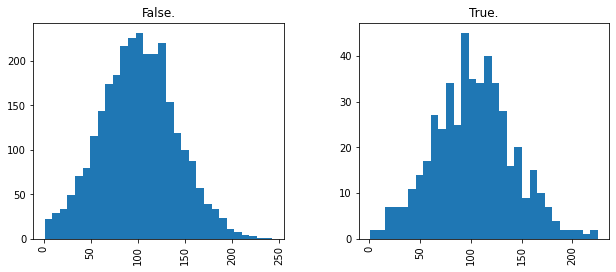

VMail Message


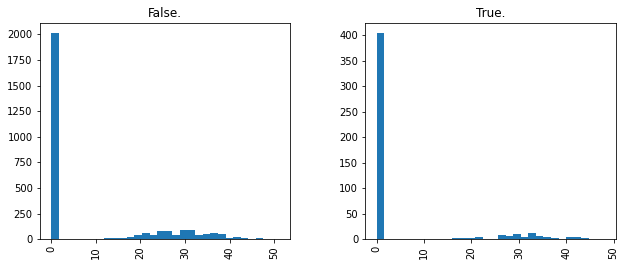

Day Mins


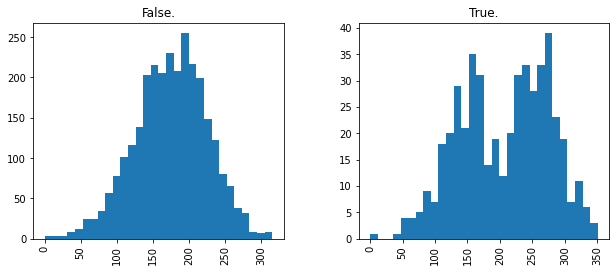

Day Calls


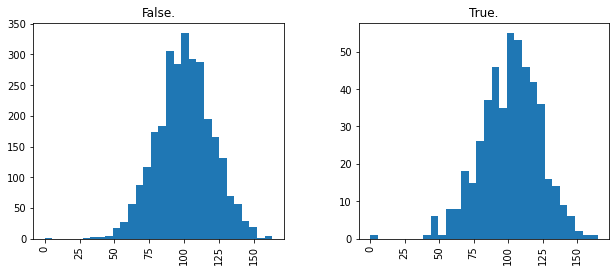

Day Charge


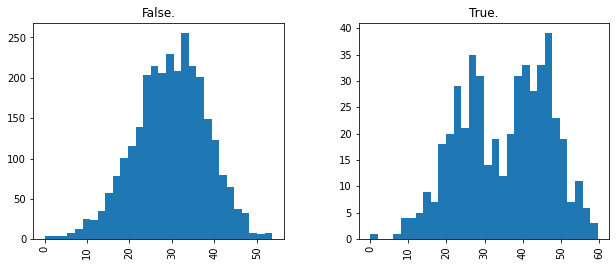

Eve Mins


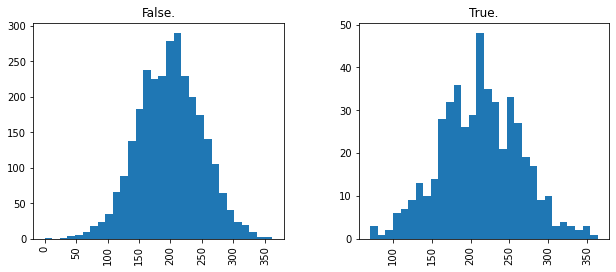

Eve Calls


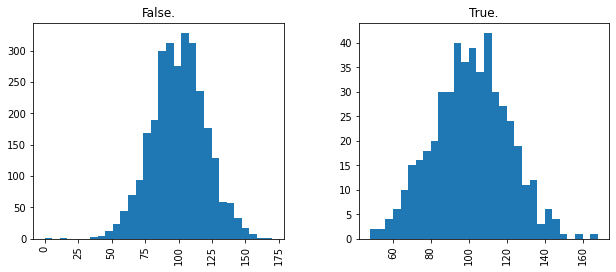

Eve Charge


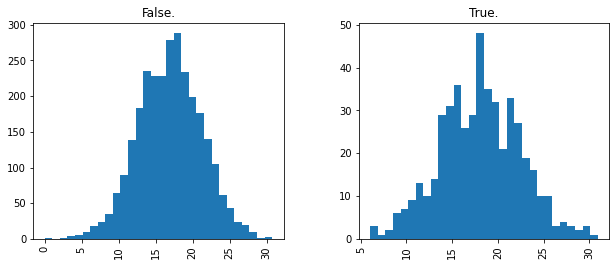

Night Mins


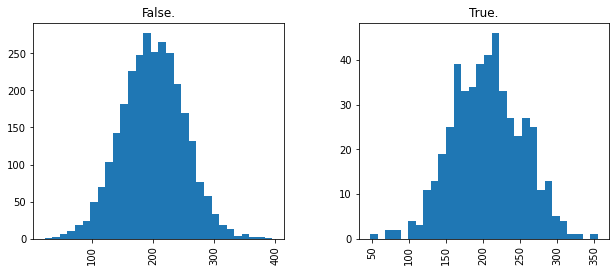

Night Calls


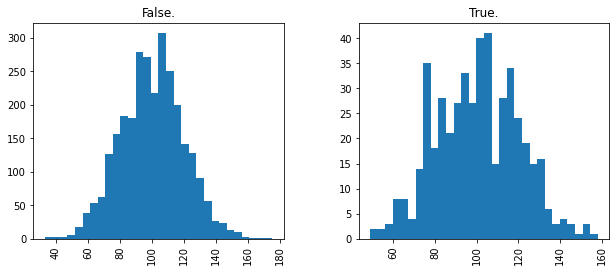

Night Charge


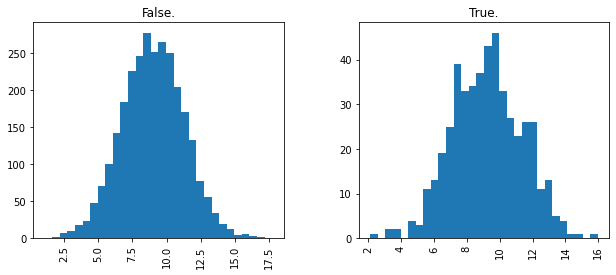

Intl Mins


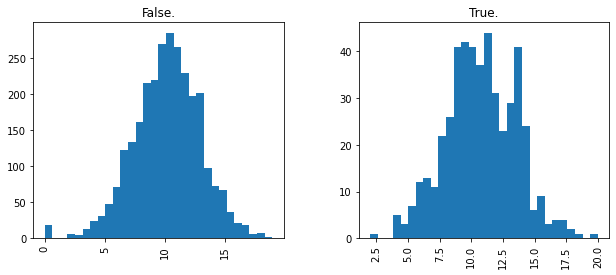

Intl Calls


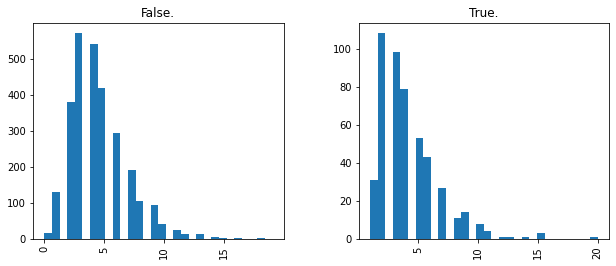

Intl Charge


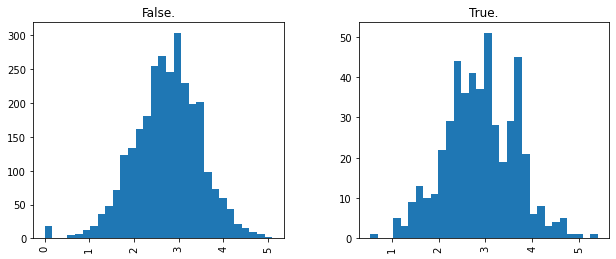

CustServ Calls


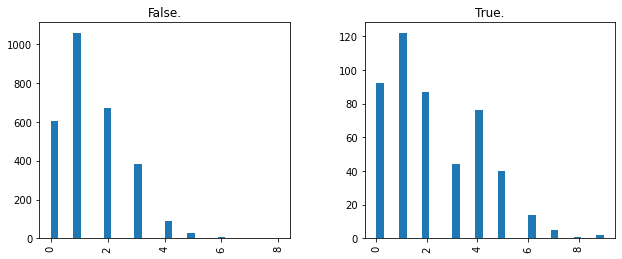

In [47]:
#  Churn Plotting by Numeric features  
import matplotlib.pyplot as plt

for col in df.select_dtypes('number').columns:
    print(col)
    hist = df[[col, 'Churn?']].hist(by='Churn?', bins=30, figsize=(10, 4) )
    plt.show()

In [48]:
ls

Car_Drive/     Churn_2.ipynb  Data/  ML.gslides
Churn_1.ipynb  Churn_3.ipynb  imgs/


In [49]:
#  Dataset Saving
df.to_csv('./Data/churn_1.csv')



---



---



### $\large \text{Correlation Table}$

In [50]:
df.corr()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
VMail Message,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
Night Calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


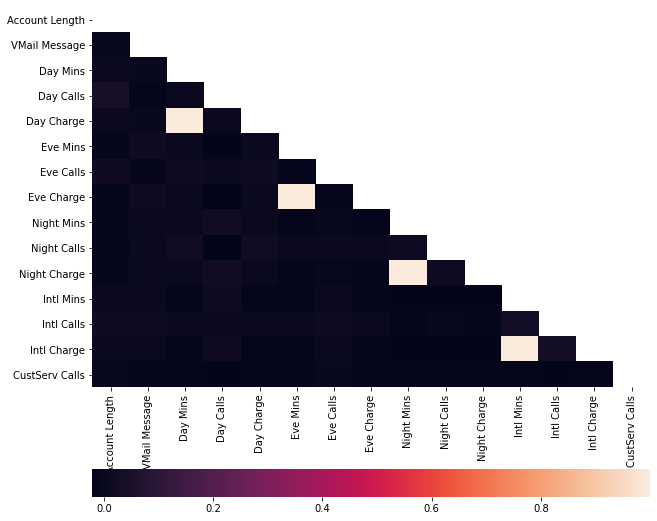

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
df_cor=df.corr()

matrix=np.triu(df_cor)
_=sns.heatmap(df_cor, mask=matrix,  cbar_kws={"orientation": "horizontal"}) #, cmap="Blues")

- We can Notice the high Correlation between Night Mins with Night Charge, Day Mins with Day Charge, Int Mins with Int Charge and Eve Mins with Eve Charge.  Let's get a scatter plot for all Numerical  Features

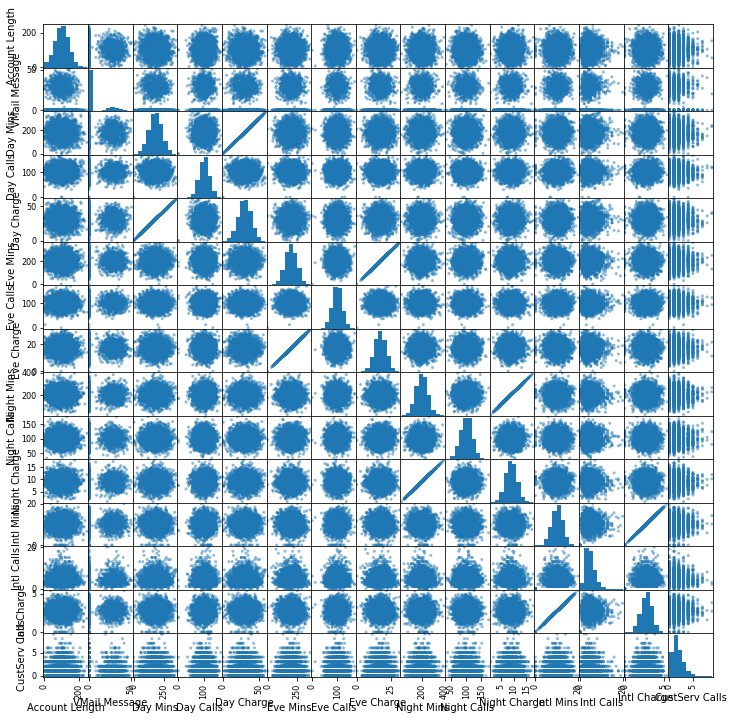

In [52]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()


In [53]:
_=sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

### $\large \text{Data Cleaning} $

In [ ]:
#  Get rid of all highly correlated features 
df.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1, inplace=True)

### $\large \text {Data Encoding}$

In [ ]:
# Display Dataset features
df.keys()

Index(['State', 'Account Length', 'Area Code', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [ ]:
# Display Dataset Feature types
df.dtypes

State             category
Account Length       int64
Area Code            int64
Int'l Plan        category
VMail Plan        category
VMail Message        int64
Day Mins           float64
Day Calls            int64
Eve Mins           float64
Eve Calls            int64
Night Mins         float64
Night Calls          int64
Intl Mins          float64
Intl Calls           int64
CustServ Calls       int64
Churn?            category
dtype: object

In [ ]:
# Numeric features  data display
df.select_dtypes("number").head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [ ]:
df["Churn?"].unique()

['False.', 'True.']
Categories (2, object): ['False.', 'True.']

In [ ]:
#  Churn Proportion 
df["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [ ]:
# Target   Encoding
df["Churn?"]=np.where(df["Churn?"].str.contains("F"), 0, 1)
#Similar instruction  : ((df["Churn?"]=="True.")+0).value_counts()

In [ ]:
#  Target  values Repartition
df["Churn?"].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

##  $$\Large \text {DataSet Training }$$
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>


In [ ]:
#  Feature &  Target    datasets
X=df.drop("Churn?", axis=1)
y=df["Churn?"]

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [ ]:
#  Splitting Features to  training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

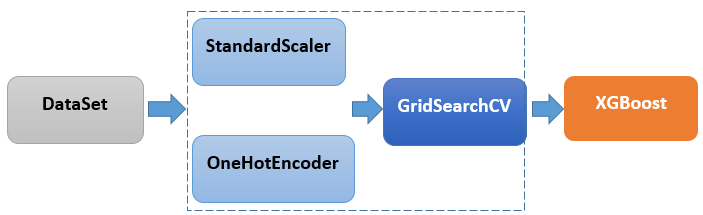

In [ ]:
# Put Features Dataset within a Pipeline and depict each process for each set of features
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector

from sklearn.pipeline import make_pipeline
  

num_pipeline= make_pipeline(
     StandardScaler()    # Rescaling
)

cat_pipeline= make_pipeline(
     OneHotEncoder(drop="if_binary", sparse=False)  # Categorical features to be Encoded. We'r dropping one feature for every binary ones.
)


In [ ]:
#  Pipeline structure 
preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #Numeric feature rescaling
     (cat_pipeline, selector(dtype_exclude="number")) , # Categorical features Encoding
     remainder="passthrough"  # Drop all features left. 
     )


In [ ]:
# pipeline Matrix Size
preprocess.fit_transform(X_train).shape

(2233, 65)

In [ ]:
# Dataset Transformation
preprocess.fit_transform(X_train)

array([[-0.81498972, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76425984, -0.51621471,  1.16095039, ...,  0.        ,
         0.        ,  1.        ],
       [-0.33870811,  1.7389225 ,  2.25408377, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.86512463, -0.68238272, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71682307, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.61714823, -0.68238272,  2.545586  , ...,  0.        ,
         0.        ,  1.        ]])

### $\large  \text{XGBoost : XGBClassifier} $
<img src="https://miro.medium.com/max/1000/0*tzKt_ABz5rRrsGoW.jpg" width=600></img>


In [ ]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA  
pipe_XGBCl= make_pipeline(
    preprocess,    # Pipiline Processing
    PCA( ),  #   Dimension Reduction

    XGBClassifier()  # Gradient Boosting Algorithm
)

- *Dimensionality reduction is learning technique that reduces the number of features and, at the same time, retains as much information as possible. It is usually performed by obtaining a set of new principal features.*

In [ ]:
#pipeline parameters  
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'pca',
 'xgbclassifier',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__d

In [ ]:
from sklearn import set_config
set_config(display='diagram', )

In [ ]:
# Hyper-parameters
param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'xgbclassifier__scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],  #for unbalanced target values

    'pca__n_components':[40, 60, 80]  # to get rid off late with 5_randomizedseach_churn

}

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg">

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/Precision-Recall_tradeoff.png" width=500>




---



![](https://adventuresindatascience.files.wordpress.com/2017/10/bb_rcv.png)

### GridSearchCV

In [ ]:
#%%time
from sklearn.model_selection import  GridSearchCV
gridSearch = GridSearchCV(pipe_XGBCl, param_grid, scoring=scorers, refit='roc_auc',cv=kf,   n_jobs=-1 , return_train_score=True, verbose=3)

In [ ]:
# Training  Dataset
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.3s


In [ ]:
# Disaply Score &  best paramters values
f"Best:  {gridSearch.best_score_} using  {gridSearch.best_params_}"

"Best:  0.750063572607811 using  {'pca__n_components': 40, 'xgbclassifier__colsample_bytree': 0.2, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 10}"

In [ ]:
# Best parameters to Keep
gridSearch.best_params_

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.2,
 'xgbclassifier__gamma': 0.0,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 100,
 'xgbclassifier__scale_pos_weight': 10}

In [ ]:
#  Best Estimator
gridSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f36795f70b8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3653cfa2e8>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.0,
                               scale_pos_weight=10))])

In [ ]:
#  test training Score
f" Score {gridSearch.best_estimator_.score(X_test, y_test):.3}"


' Score 0.764'

In [ ]:
#  AUC  Score  for  X_train training  DataSet
y_pred_train= gridSearch.predict(X_train)
f"train dataset performance : {roc_auc_score(y_train, y_pred_train)} "

'Performance sur le train : 0.8737749825750086 '

In [ ]:
#  AUC  Score  for  X_test testing  DataSet
y_pred_test= gridSearch.predict(X_test)
f"Test dataset Performance : {roc_auc_score(y_test, y_pred_test):0.3} "

'Performance sur le train : 0.755 '

- When you observe high training accuracy, but low tests accuracy, it is likely
that you encounter overfitting problem.

In [ ]:
# prediction 
y_pred=gridSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

'Accuracy: 0.764'

In [ ]:
# Recall Score 
f"Test Performance: {recall_score(y_test, gridSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.744 '

In [ ]:
! pip install  scikit-plot

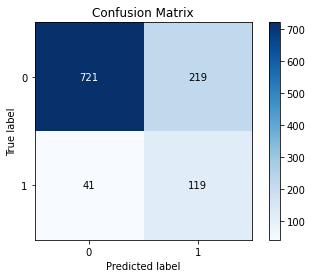

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

- Recall
recall determins the number of false negatives that were thrown into the prediction result.
$$ Recall = \frac{TP}{TP + FN}$$

![](https://newbiettn.github.io/images/confusion-matrix-noted.jpg)

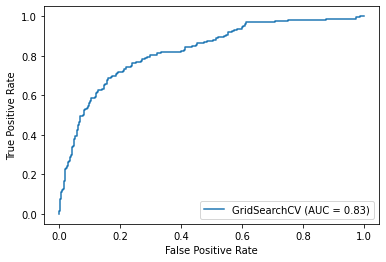

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

- ROC ( *Receiver Operator Characteristic Curve*)  is a probability curve and AUC represents degree or measure of separability

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       940
           1       0.35      0.74      0.48       160

    accuracy                           0.76      1100
   macro avg       0.65      0.76      0.66      1100
weighted avg       0.86      0.76      0.79      1100



$$\Large  F1=\frac {2*(precision* recall)}{precision + recall}$$

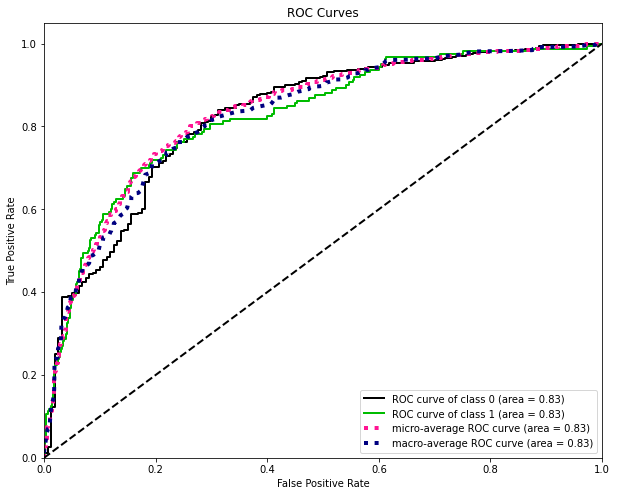

In [ ]:
y_probas = gridSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


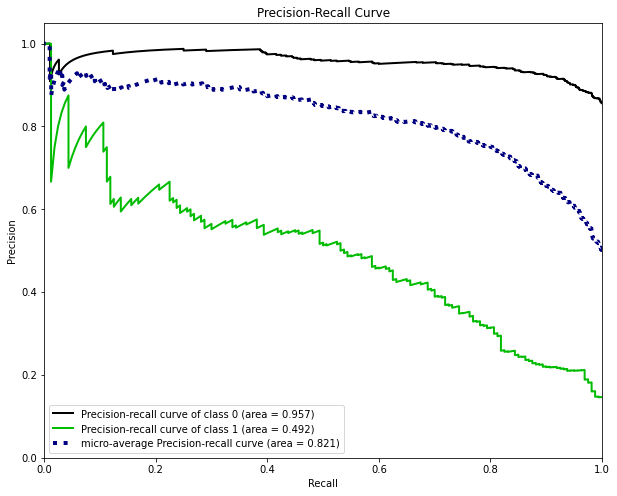

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, y_probas, figsize=(10, 8))
#ConfusonMattrix: Churn Customers in Green   

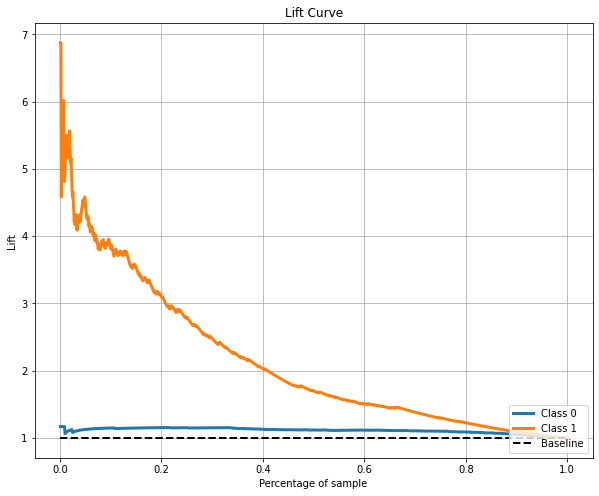

In [ ]:
# Lift is a measure of the effectiveness of a predictive model calculated as 
#the ratio between the results obtained with and without the predictive model.
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize=(10, 8))

### RandomizedSearchCV

In [ ]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3, 
                                n_jobs=-1 ,scoring= 'accuracy'  , n_iter=1000 ) # refit="recall_score" )

In [ ]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 576 is smaller than n_iter=1000. Running 576 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  8.0min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b49c0b8>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps...
                                             ('xgbclassifier',
                                              XGBClassifier())]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'pca__n_components': [40, 60, 80],
                                        'xgbclassifier__colsample_bytree': [0.1,
                                                                            0.2],
                                        'xgbclassifier__gamma': [0.0, 0.1, 0.2],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2,
                                                                         0.3],
                                        'xgbclassifier__max_depth': range(3, 5),
                                        'xgbclassifier__n_estimators': [50, 100,
                                                                        150,
                                                                        200]},
                   scoring='accuracy', verbose=3)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_ 

{'pca__n_components': 40,
 'xgbclassifier__colsample_bytree': 0.2,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__learning_rate': 0.2,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 150}

In [ ]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b4a6f98>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f366b4a6588>)])),
                ('pca', PCA(n_components=40)),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.1,
                               learning_rate=0.2, n_estimators=150))])

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.875'

In [ ]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}' 

'Accuracy: 0.875'

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار 
f'Best AUC Score: {RdSearch.best_score_ :.3}' 


'Best AUC Score: 0.877'

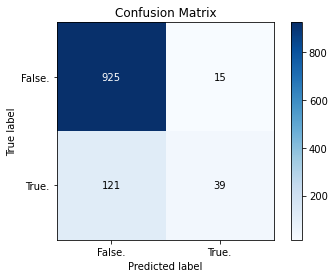

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #, normalize=True)

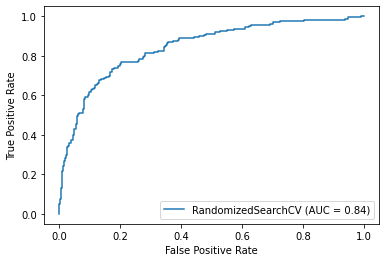

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gridSearch, X_test, y_test)

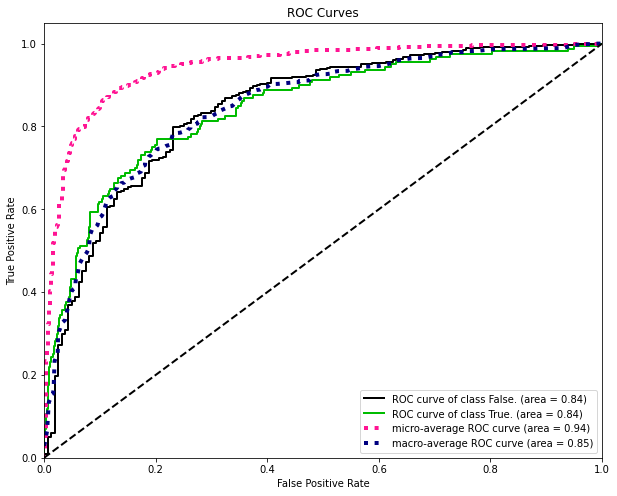

In [ ]:
#
y_probas = RdSearch.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [ ]:
y_probas = RdSearch.predict_proba(X_test)
y_probas[:3]

array([[0.9589995 , 0.04100047],
       [0.99620414, 0.00379584],
       [0.5277356 , 0.4722644 ]], dtype=float32)

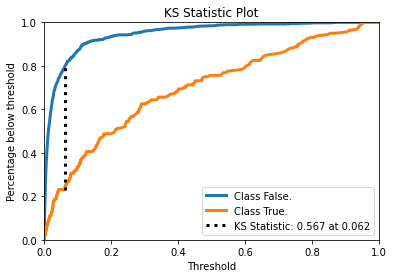

In [ ]:
# AUC     
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused 
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

In [ ]:
print ('ROC AUC =', metrics.roc_auc_score(y_test, y_probas[:,1]))

ROC AUC = 0.8443683510638298


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      False.       0.88      0.98      0.93       940
       True.       0.72      0.24      0.36       160

    accuracy                           0.88      1100
   macro avg       0.80      0.61      0.65      1100
weighted avg       0.86      0.88      0.85      1100



In [ ]:
# Dataset display
pd.DataFrame({"Predicted":y_pred, "Actual Value": y_test}).sample(6, random_state=10)

NameError: ignored

## A